In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False
import numpy as np

In [200]:
df_first = pd.read_excel('../datasets/국내총생산 및 경제성장률 (GDP)_20241219.xlsx', index_col=0)
series_GDP = df_first.transpose()
series_GDP['경제성장률(실질GDP성장률)'] = pd.to_numeric(series_GDP['경제성장률(실질GDP성장률)'], errors='coerce')
series_GDP['경제성장률(실질GDP성장률)'].fillna(0, inplace=True)
series_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 20221/4 to 20243/4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   국내총생산(명목GDP)     11 non-null     object 
 1   경제성장률(실질GDP성장률)  11 non-null     float64
dtypes: float64(1), object(1)
memory usage: 264.0+ bytes


/tmp/ipykernel_461/1877101285.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  series_GDP['경제성장률(실질GDP성장률)'].fillna(0, inplace=True)


In [201]:
df_second = pd.read_excel('../datasets/취업자 수_실업률 추이_20241219.xlsx', index_col=0)
series_employment = df_second.transpose()
series_employment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 20221/4 to 20243/4
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   취업자 증감    11 non-null     float64
 1   - 농림어업    11 non-null     float64
 2   - 제조업     11 non-null     float64
 3   - 건설업     11 non-null     float64
 4   실업자       11 non-null     float64
 5   실업률(%)    11 non-null     float64
 6   청년실업자     11 non-null     float64
 7   청년실업률(%)  11 non-null     float64
dtypes: float64(8)
memory usage: 792.0+ bytes


In [202]:
df_third = pd.read_excel('../datasets/소비동향_20241220.xlsx', index_col=0)
series_consumption = df_third.transpose()
series_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 20221/4 to 20243/4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   계       11 non-null     float64
 1   내구재     11 non-null     float64
 2   준내구재    11 non-null     float64
 3   비내구재    11 non-null     float64
dtypes: float64(4)
memory usage: 440.0+ bytes


In [ ]:
df_fourth = pd.read_excel('../datasets/경상수지 및 무역수지_20241220.xlsx', index_col=0)
series_cab = df_fourth.transpose()
series_cab['경상수지'] = pd.to_numeric(series_cab['경상수지'], errors='coerce')
series_cab['경상수지'].fillna(0, inplace=True)
series_cab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 20221/4 to 20243/4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   경상수지    11 non-null     float64
 1   상품수지    11 non-null     object 
 2   서비스수지   11 non-null     object 
 3   본원소득수지  11 non-null     object 
 4   이전소득수지  11 non-null     object 
 5   무역수지    11 non-null     object 
dtypes: float64(1), object(5)
memory usage: 616.0+ bytes


/tmp/ipykernel_461/166180409.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  series_cab['경상수지'].fillna(1, inplace=True)


In [204]:
series_cab

,경상수지,상품수지,서비스수지,본원소득수지,이전소득수지,무역수지
20221/4,1.0,"10,752",202,"3,643",-632,"-4,502"
20222/4,1.0,"10,221",-988,"2,318","-1,044","-6,417"
20223/4,-390.0,"-3,043","-2,986","6,518",-879,"-18,276"
20224/4,1.0,"-2,310","-3,481","7,868",-330,"-18,589"
20231/4,1.0,"-9,781","-7,591","12,253",-841,"-22,827"
20232/4,1.0,"6,409","-4,711","6,235",-828,"-3,464"
20233/4,1.0,"17,115","-7,331","7,416","-1,600","6,382"
20234/4,1.0,"20,349","-6,026","5,701","-1,281","9,563"
20241/4,1.0,"18,941","-6,861","5,883","-1,127","8,420"
20242/4,1.0,"25,605","-4,546","1,106",-963,"14,536"


In [205]:
symbol_GDP = (series_GDP['경제성장률(실질GDP성장률)']/series_GDP['경제성장률(실질GDP성장률)'].iloc[0])*100
symbol_employment = (series_employment.iloc[:,0]/series_employment.iloc[:,0].iloc[0])*100
symbol_consumption = (series_consumption['계']/series_consumption['계'].iloc[0])*100
symbol_cab = (series_cab['경상수지']/series_cab['경상수지'].iloc[0])*100


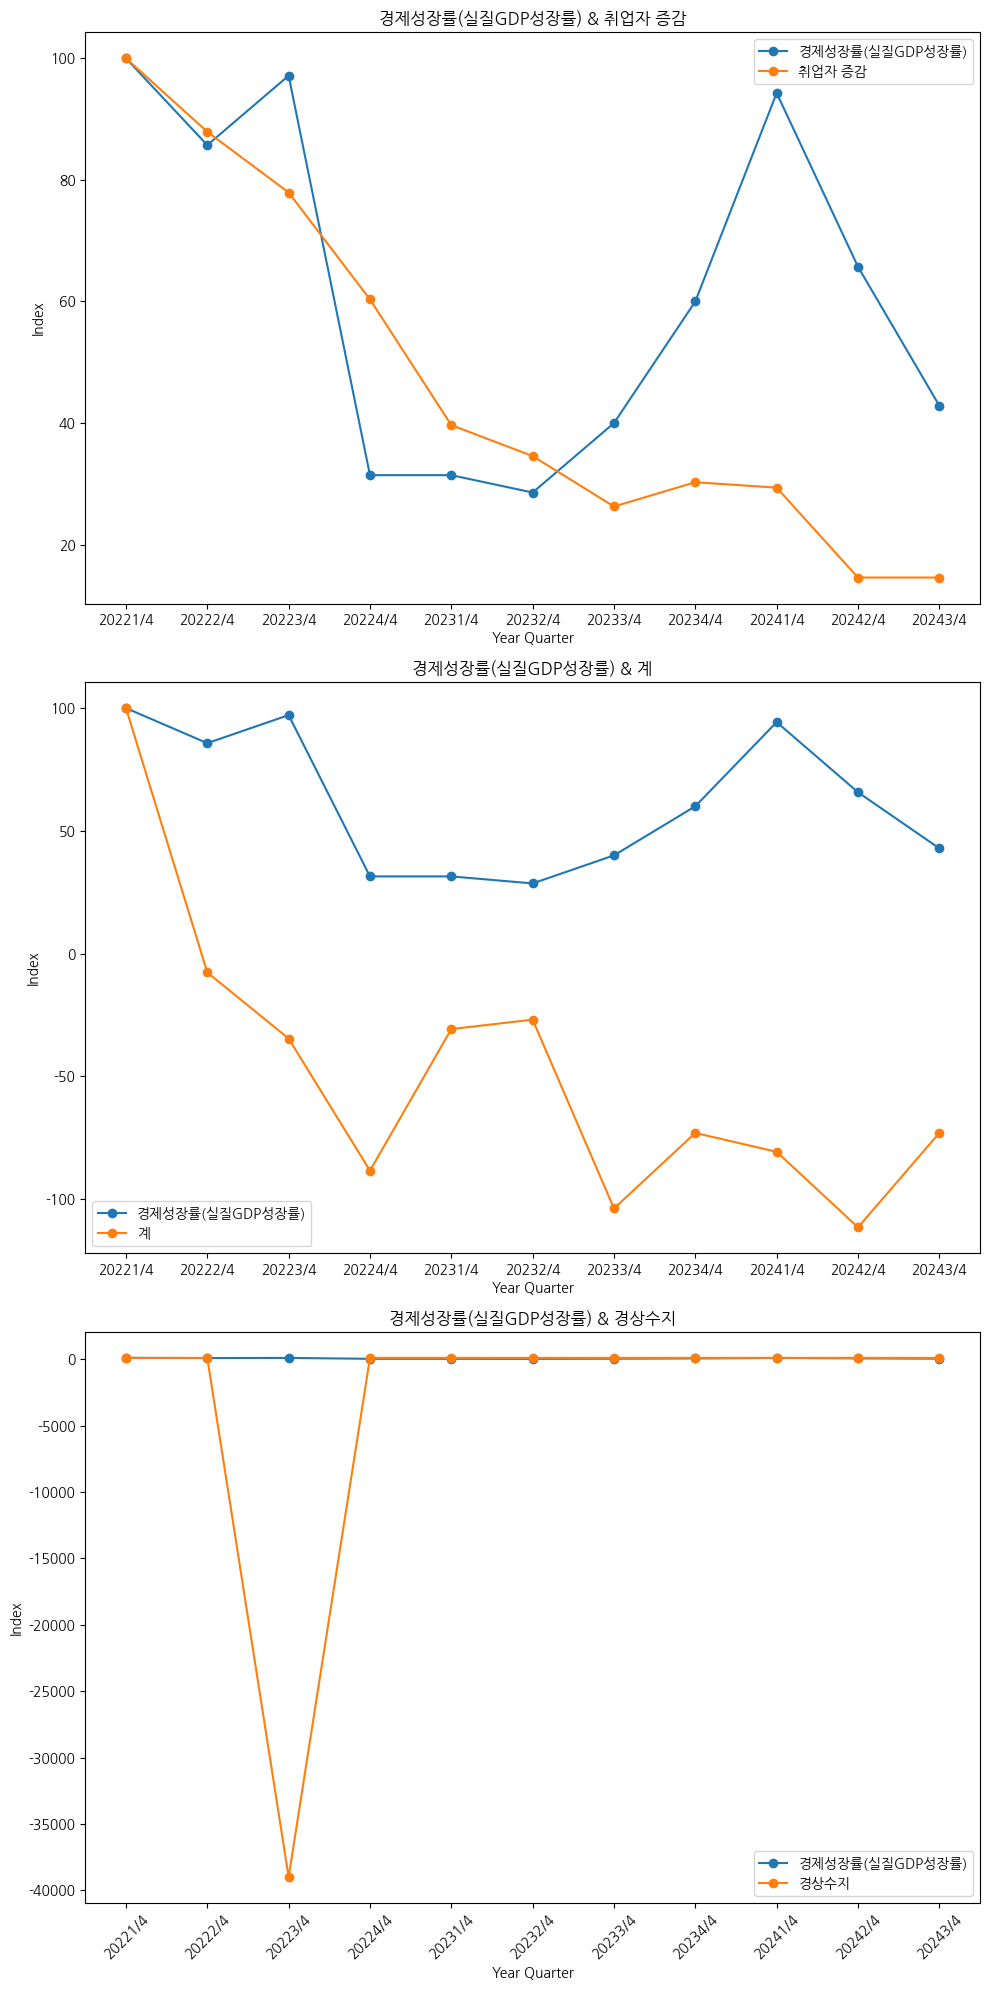

In [206]:
fig, axes = plt.subplots(3,1,figsize=(10,20), dpi=100)

axes[0].plot(symbol_GDP, label='경제성장률(실질GDP성장률)', marker='o')
axes[0].plot(symbol_employment, label='취업자 증감', marker='o')
axes[0].set_title('경제성장률(실질GDP성장률) & 취업자 증감')
axes[0].set_xlabel('Year Quarter')
axes[0].set_ylabel('Index')
axes[0].legend()

axes[1].plot(symbol_GDP, label='경제성장률(실질GDP성장률)', marker='o')
axes[1].plot(symbol_consumption, label='계', marker='o')
axes[1].set_title('경제성장률(실질GDP성장률) & 계')
axes[1].set_xlabel('Year Quarter')
axes[1].set_ylabel('Index')
axes[1].legend()

axes[2].plot(symbol_GDP, label='경제성장률(실질GDP성장률)', marker='o')
axes[2].plot(symbol_cab, label='경상수지', marker='o')
axes[2].set_title('경제성장률(실질GDP성장률) & 경상수지')
axes[2].set_xlabel('Year Quarter')
axes[2].set_ylabel('Index')
axes[2].legend()

plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()
